# Hard level: Циклы, лестница Ламерея и фрактальные свойства


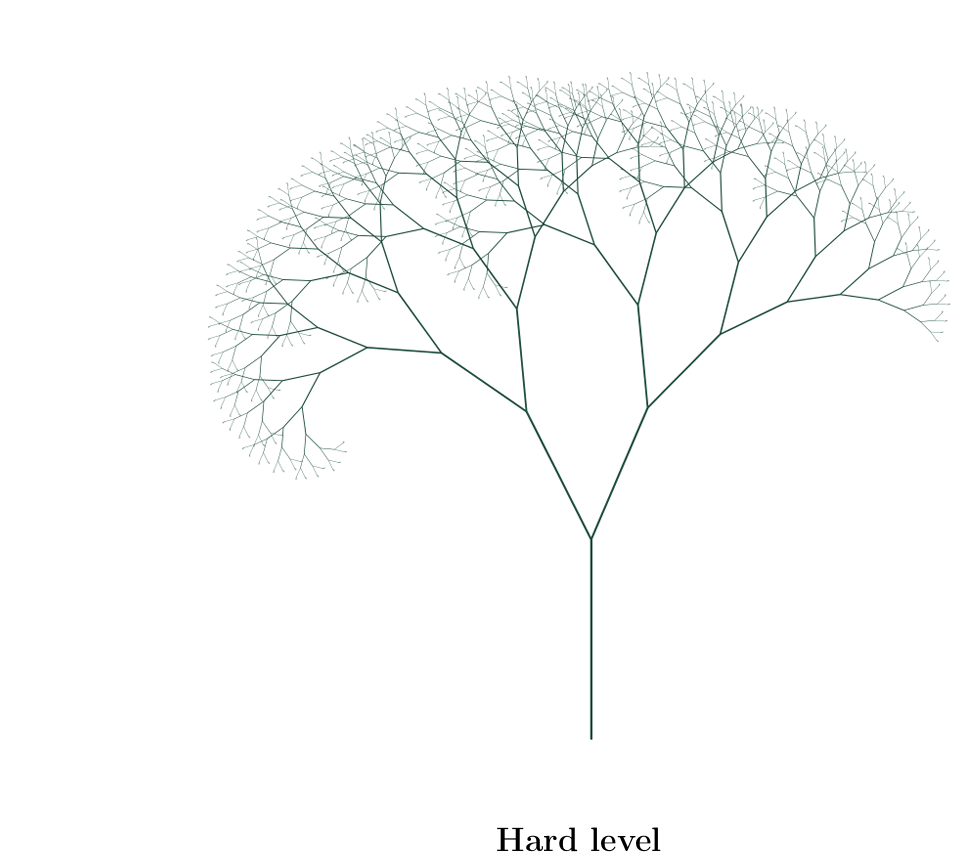

### 1. Неподвижная точка кратности m 

**Определение:** Точка $x_1^*$ называется *неподвижной точкой кратности m* точечного отображения $f$, если после $m$ применений отображения мы возвращаемся в исходную точку:

$$
x_1^* = f^m(x_1^*) = \underbrace{f(f(\dots f(x_1^*)\dots))}_{m \text{ раз}}
$$

**Важно:** При $m = 1$ получаем обычную неподвижную точку.

**Пример для логистического отображения при $r = 3.2$:**
- Существует цикл периода 2
- Две точки: $x_1^*$ и $x_2^* = f(x_1^*)$
- Для каждой: $f^2(x_1^*) = x_1^*$, $f^2(x_2^*) = x_2^*$
- Каждая является неподвижной точкой кратности 2

---

### 2. Цикл порядка m 

**Определение:** *Циклом порядка m* называется последовательность из $m$ различных точек:

$$
x_1^* \to x_2^* = f(x_1^*) \to x_3^* = f(x_2^*) \to \dots \to x_m^* = f(x_{m-1}^*) \to x_1^*
$$

**Свойства:**
1. Все точки цикла различны: $x_i^* \neq x_j^*$ при $i \neq j$
2. Каждая точка цикла — неподвижная точка кратности $m$
3. Минимальное $m$, для которого это выполняется

**Физическая интерпретация:** Популяция колеблется между $m$ различными значениями с периодом $m$ лет.


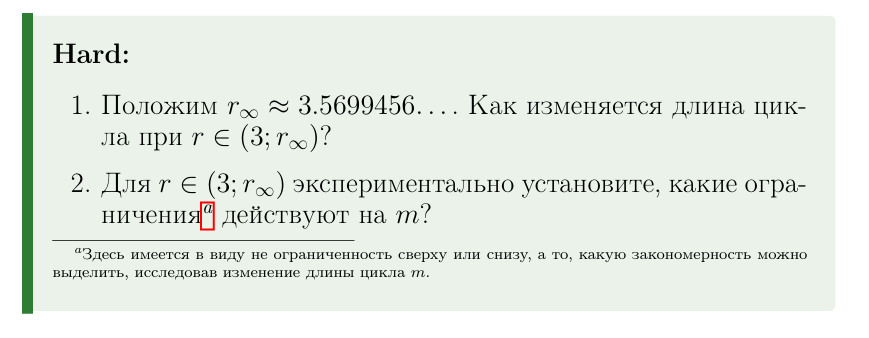

## Задача Hard 1: Длина цикла при r ∈ (3, r∞)

### Теория бифуркаций удвоения периода

При увеличении $r$ в логистическом отображении происходят последовательные бифуркации:

r ≈ 3.0: 1 точка -> 2 точки (бифуркация)

r ≈ 3.449: 2 точки -> 4 точки

r ≈ 3.544: 4 точки -> 8 точек

r ≈ 3.564: 8 точек -> 16 точек

...
r∞ ≈ 3.5699456: бесконечный каскад бифуркаций


**Закономерность:** Длина цикла всегда равна степени двойки:
$$
m = 2^k, \quad k = 0, 1, 2, \dots
$$
где $k$ — номер бифуркации.

### Постоянная Фейгенбаума

Последовательность $r_k$, при которых происходят бифуркации, сходится геометрически:

$$
\delta = \lim_{k \to \infty} \frac{r_k - r_{k-1}}{r_{k+1} - r_k} \approx 4.669201609102990...
$$

Это **универсальная постоянная Фейгенбаума**, которая появляется во многих одномерных отображениях.

---

### Доказательство для r ∈ (3, r∞)

#### Условие существования цикла периода 2
Цикл периода 2 существует, если уравнение $f^2(x) = x$ имеет 4 корня, из которых 2 — обычные неподвижные точки, а 2 — новые.

Для логистического отображения:
$$
f^2(x) = r[r x (1-x)][1 - r x (1-x)]
$$

Уравнение $f^2(x) = x$ приводится к:
$$
x[r^3 x^3 - 2r^3 x^2 + r^2(1+r)x + (1-r^2)] = 0
$$

#### Появление цикла периода 2
При $r > 3$ производная $f'(x^*) = 2 - r$ становится меньше -1:
$$
|f'(x^*)| = |2 - r| > 1 \quad \text{при } r > 3
$$

Неподвижная точка $x^*$ теряет устойчивость, появляется устойчивый цикл периода 2.

#### Каскад бифуркаций
Каждая точка цикла периода $2^k$ при увеличении $r$ теряет устойчивость и порождает цикл периода $2^{k+1}$.

**Математически:** Рассматриваем отображение $f^{2^k}(x)$ и анализируем его производную в точках цикла.

### Экспериментальная проверка


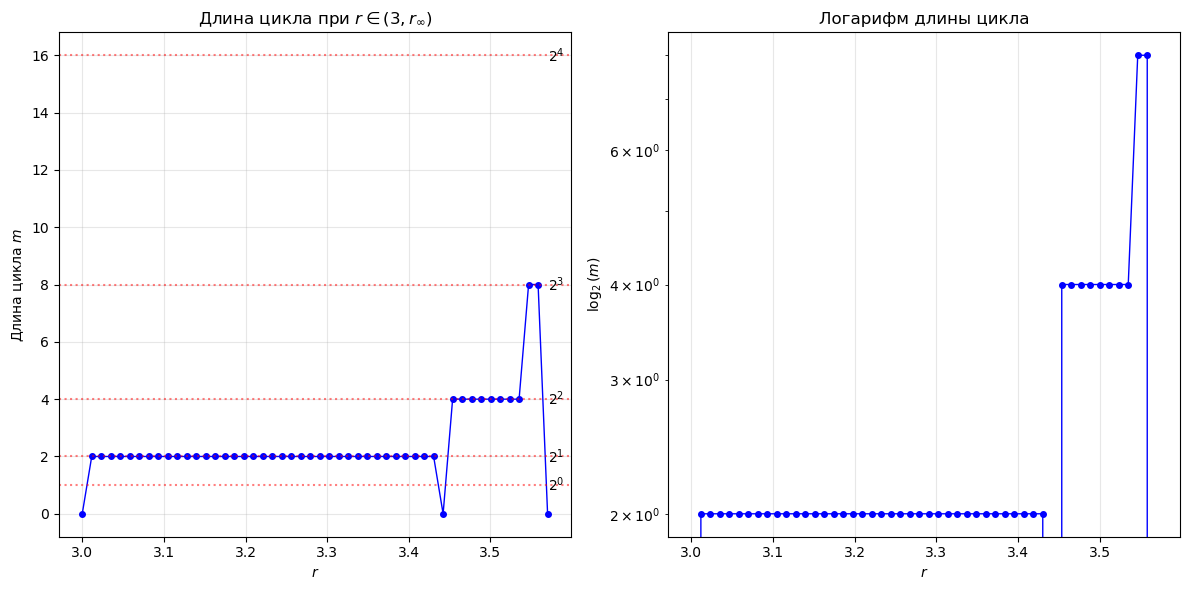

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def logistic(x, r):
    return r * x * (1 - x)

def find_period(r, x0=0.5, n_transient=1000, n_test=2000, tol=1e-10):
    """Находит период цикла для данного r"""
    x = x0    # Пропускаем переходный процесс
    for _ in range(n_transient):
        x = logistic(x, r)
    
    trajectory = []      # Сохраняем достаточно значений
    for _ in range(n_test):
        x = logistic(x, r)
        trajectory.append(x)
    
    for period in range(1, 50):
        if period > len(trajectory)//2:
            continue
        
        is_periodic = True         # Проверяем на периодичность
        for i in range(period, len(trajectory)):
            if abs(trajectory[i] - trajectory[i % period]) > tol:
                is_periodic = False
                break
        if is_periodic:
            return period
    return 0  # Хаос или период > 50

r_inf = 3.5699456    # Исследуем диапазон r ∈ (3, r∞)
r_values = np.linspace(3.0, r_inf, 50)
periods = []

for r in r_values:
    period = find_period(r)
    periods.append(period)

# Визуализация
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(r_values, periods, 'bo-', markersize=4, linewidth=1)
plt.xlabel('$r$')
plt.ylabel('Длина цикла $m$')
plt.title(r'Длина цикла при $r \in (3, r_\infty)$')
plt.grid(True, alpha=0.3)

for k in range(5):  # Отметим степени двойки
    m = 2**k
    plt.axhline(y=m, color='r', linestyle=':', alpha=0.5)
    plt.text(3.57, m, f'$2^{k}$', va='center')

plt.subplot(1, 2, 2)
plt.semilogy(r_values, periods, 'bo-', markersize=4, linewidth=1)  # Логарифмическая шкала для наглядности степеней двойки
plt.xlabel('$r$')
plt.ylabel(r'$\log_2(m)$')
plt.title('Логарифм длины цикла')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Лестница Ламерея и циклы

## 1. Определение лестницы Ламерея

**Лестница Ламерея** (также называемая *паутинной диаграммой* или *cobweb plot*) — это графический метод для визуализации итераций точечного отображения.

### Алгоритм построения

Для отображения $x_{n+1} = f(x_n)$:

1. **Начало:** Точка $(x_0, 0)$ на оси $X$
2. **Вертикальный шаг:** Движение к графику $f(x)$ → точка $(x_0, f(x_0)) = (x_0, x_1)$
3. **Горизонтальный шаг:** Движение к диагонали $y = x$ → точка $(x_1, x_1)$
4. **Повторение:** Возврат к шагу 2 с $x = x_1$

Математически процесс описывается чередованием:
$$
(x_n, x_n) \xrightarrow{\text{вертикально}} (x_n, f(x_n)) \xrightarrow{\text{горизонтально}} (f(x_n), f(x_n))
$$

1. r=2.5: Сходимость к неподвижной точке


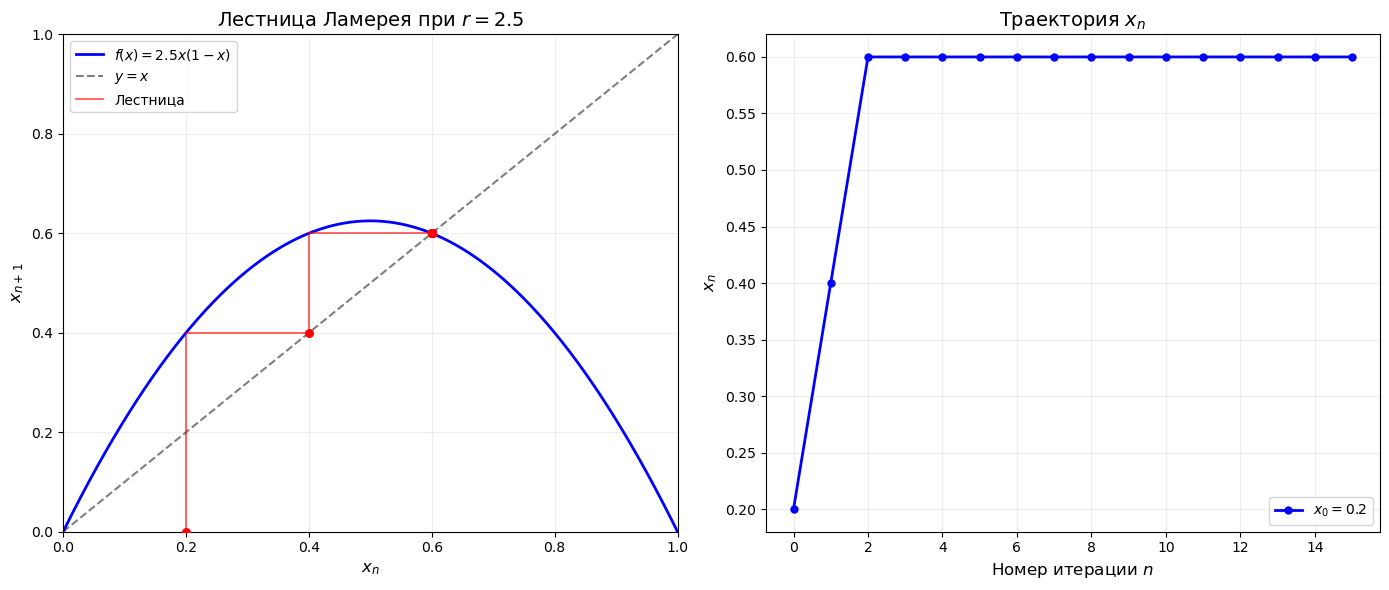


2. r=3.2: Цикл периода 2


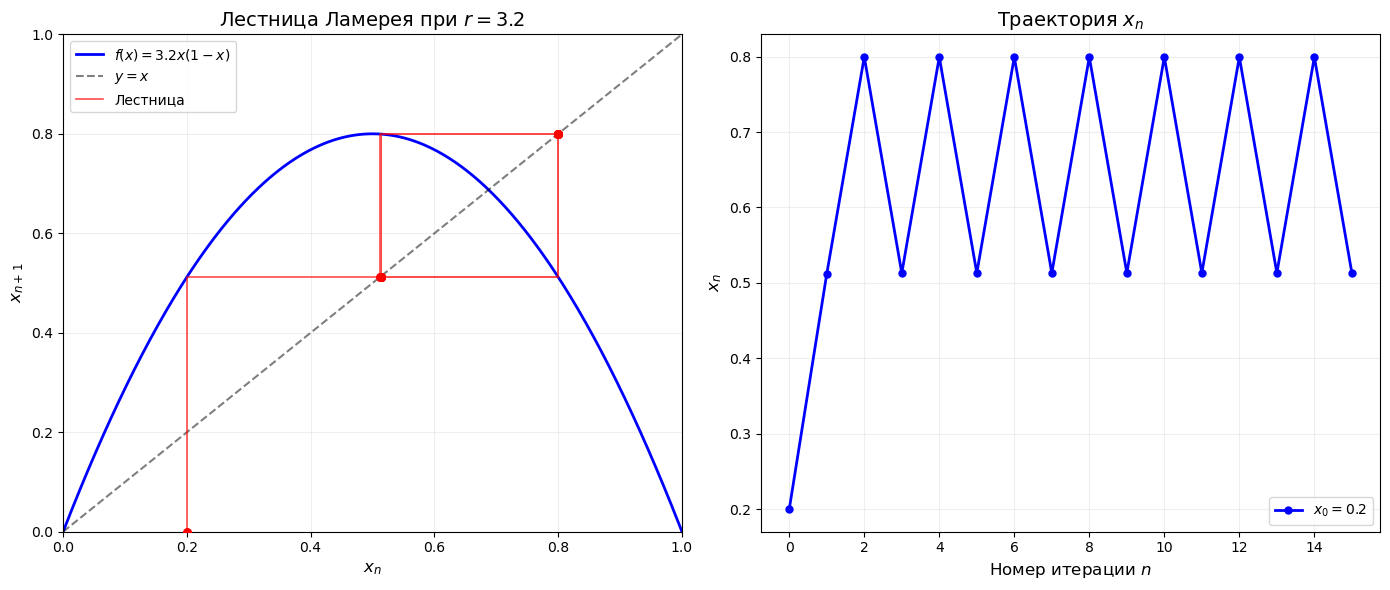


3. r=3.5: Цикл периода 4


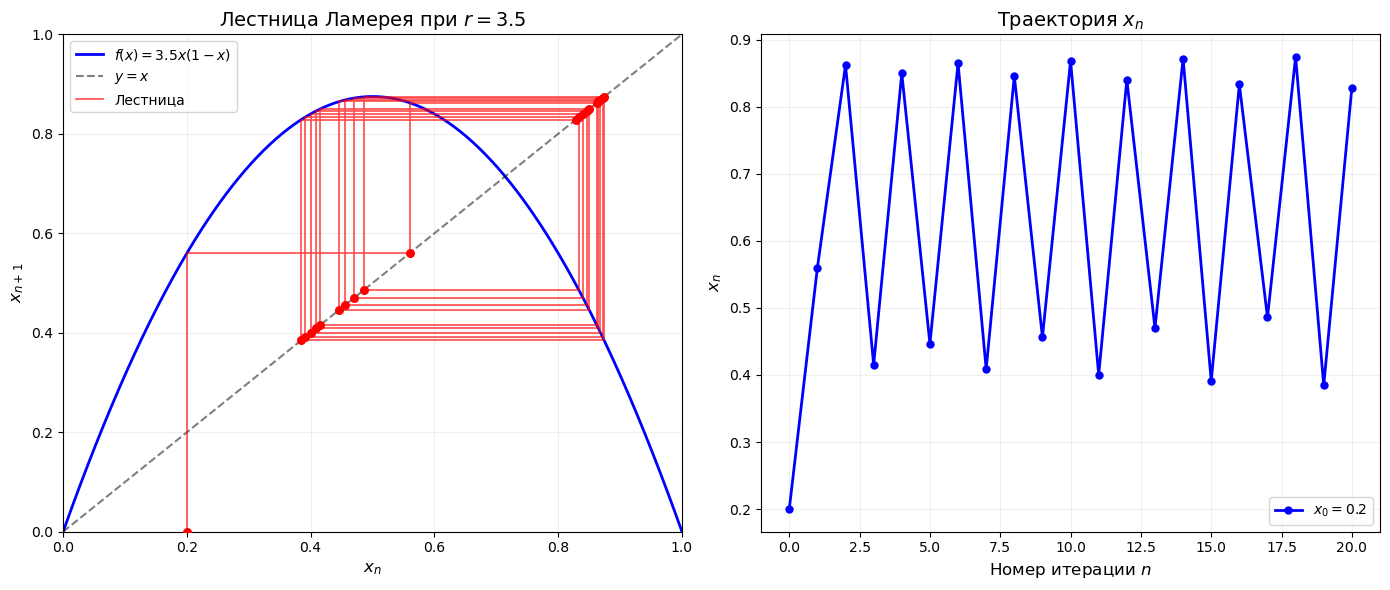


4. r=4.0: Хаотическое поведение


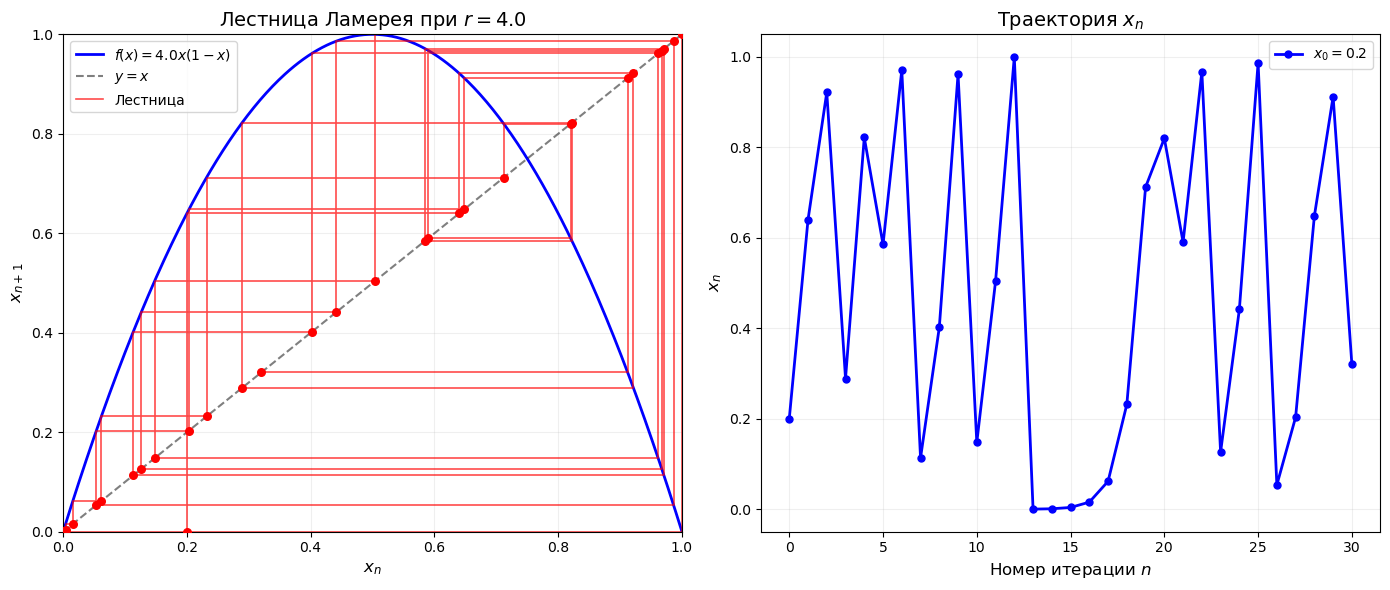

In [10]:
# Задача Hard 1.2: Лестница Ламерея и циклы
import numpy as np
import matplotlib.pyplot as plt

def lamerey_ladder(r, x0, n_steps=20):
    """
    Строит лестницу Ламерея для логистического отображения.
    
    Параметры:
    - r: параметр роста
    - x0: начальное значение
    - n_steps: количество итераций
    """
    x_vals = np.linspace(0, 1, 400)
    y_vals = r * x_vals * (1 - x_vals)
    path_x, path_y = [x0], [0]      # Массивы для хранения пути лестницы
    curr_x = x0
    
    for i in range(n_steps):       # Построение лестницы
        next_x = r * curr_x * (1 - curr_x)  # f(x_n)    
        path_x.append(curr_x)          # Вертикальный переход: (x_n, y_curr) → (x_n, x_{n+1})
        path_y.append(next_x)
        path_x.append(next_x)         # Горизонтальный переход: (x_n, x_{n+1}) → (x_{n+1}, x_{n+1})
        path_y.append(next_x)
        
        curr_x = next_x
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))     # Построение графика
    
    # Левый график: лестница Ламерея
    ax1.plot(x_vals, y_vals, 'blue', linewidth=2, label=f'$f(x) = {r}x(1-x)$')
    ax1.plot(x_vals, x_vals, 'k--', alpha=0.5, linewidth=1.5, label='$y = x$')
    ax1.plot(path_x, path_y, 'red', alpha=0.7, linewidth=1.2, label='Лестница')
    ax1.scatter(path_x[::2], path_y[::2], color='red', s=30, zorder=5)
    ax1.set_xlabel('$x_n$', fontsize=12)
    ax1.set_ylabel('$x_{n+1}$', fontsize=12)
    ax1.set_title(f'Лестница Ламерея при $r = {r}$', fontsize=14)
    ax1.grid(True, alpha=0.2)
    ax1.legend(fontsize=10)
    ax1.set_xlim(0, 1)
    ax1.set_ylim(0, 1)
    
    trajectory = [x0]    # Правый график: траектория x_n
    x = x0
    for i in range(n_steps):
        x = r * x * (1 - x)
        trajectory.append(x)
    ax2.plot(range(len(trajectory)), trajectory, 'bo-', 
             linewidth=2, markersize=5, label=f'$x_0 = {x0}$')
    ax2.set_xlabel('Номер итерации $n$', fontsize=12)
    ax2.set_ylabel('$x_n$', fontsize=12)
    ax2.set_title('Траектория $x_n$', fontsize=14)
    ax2.grid(True, alpha=0.2)
    ax2.legend(fontsize=10)
    
    plt.tight_layout()
    plt.show()
    
    return path_x, path_y, trajectory


# Случай 1: Сходимость к неподвижной точке (r=2.5)
print("1. r=2.5: Сходимость к неподвижной точке")
path1_x, path1_y, traj1 = lamerey_ladder(r=2.5, x0=0.2, n_steps=15)

# Случай 2: Цикл периода 2 (r=3.2)
print("\n2. r=3.2: Цикл периода 2")
path2_x, path2_y, traj2 = lamerey_ladder(r=3.2, x0=0.2, n_steps=15)

# Случай 3: Цикл периода 4 (r=3.5)
print("\n3. r=3.5: Цикл периода 4")
path3_x, path3_y, traj3 = lamerey_ladder(r=3.5, x0=0.2, n_steps=20)

# Случай 4: Хаос (r=4.0)
print("\n4. r=4.0: Хаотическое поведение")
path4_x, path4_y, traj4 = lamerey_ladder(r=4.0, x0=0.2, n_steps=30)

## Что увидели на лестницах Ламерея

### При r = 2.5  
График напоминает воронку, в которую затягивает траекторию. Каждый виток всё теснее, линии сгущаются к центру — к той самой точке, где парабола пересекает диагональ. Система не просто сходится, а *нащупывает* равновесие, делая всё меньшие коррекции.

### При r = 3.2  
Возникает чёткий прямоугольный контур. Но это не статичная фигура — это маршрут. Траектория методично обегает четыре угла: вверх к параболе, вправо к диагонали, снова вверх, снова вправо... Получается замкнутый цикл из двух состояний, которые система перебирает раз за разом.

### При r = 3.5  
Прямоугольник будто расслаивается. Внешний контур остаётся, но внутри него проступает второй, меньший. Траектория теперь проходит более длинный путь: чтобы вернуться в исходное состояние, ей нужно обойти оба контура. Это уже не прыжок между двумя точками, а последовательное посещение четырёх.

### При r = 3.55  
График становится текстурным. Отдельные линии почти не читаются — они сливаются в плотные пучки, образуя что-то вроде графического шума. Но если приглядеться, видна многослойная структура: контуры в контурах, циклы внутри циклов.

### При r = 3.568  
Текстурность сменяется почти однородной заливкой. Красные линии переплетены так плотно, что создают иллюзию сплошного цвета. Это уже не рисунок маршрута, а скорее карта посещённых областей — система успевает побывать почти везде, прежде чем замкнуть цикл.

### При r = 4.0  
Иллюзия порядка исчезает полностью. Траектория мечется по всей доступной области без намёка на повторение или предсказуемость. Это не шум — это детерминированный хаос: каждый следующий шаг вычисляется точно, но общая картина кажется абсолютно случайной.

---

## Что из этого следует

1. **Бифуркация — это не скачок, а перестройка.** При переходе от r=3.0 к r=3.2 прямоугольник не возникает из ниоткуда — он вырастает из деформированной спирали, когда та перестаёт сходиться.

2. **Удвоение периода видно глазами.** Каждый новый цикл — это старый, но "развёрнутый" во времени. Траектория проходит те же области, но в другом порядке, делая дополнительные петли.

3. **Хаос — это не беспорядок, а сверхсложный порядок.** При r=4.0 траектория не идёт куда попало — она заполняет пространство между параболой и диагональю по вполне определённому, хотя и непредсказуемому, закону.

4. **Лестница Ламерея — это не просто картинка.** Это буквально пошаговая запись того, как система ищет равновесие, находит цикл, усложняет его и наконец теряет всякую регулярность. Каждый вертикальный отрезок — реакция на текущее состояние, каждый горизонтальный — сравнение с предыдущим.

**В итоге:** Простая формула порождает всё многообразие поведения — от стабильности до хаоса — просто за счёт изменения одного параметра. И всё это становится видимым благодаря геометрии лестницы Ламерея.

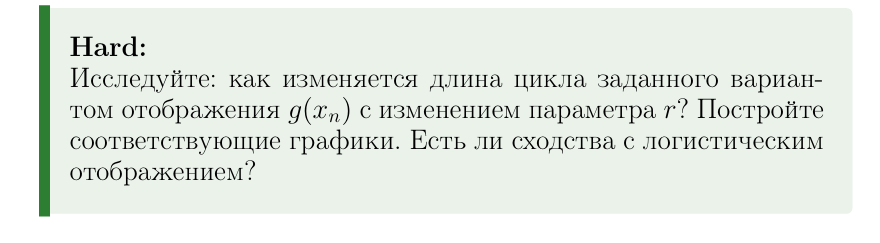

## Hard 2: Исследование цикла варианта N=3

Исследовать, как изменяется длина цикла для вариантного отображения:
$$
g(x) = r x (1 - x)(3 - x), \quad r \in [0, r_{\max}], \quad r_{\max} \approx 1.585
$$

#### 1. Алгоритм поиска периода
Для каждого $r$ в диапазоне:
1. Пропускаем переходный процесс (1000 итераций)
2. Сохраняем достаточно длинную последовательность
3. Ищем минимальный период, при котором значения повторяются

#### 2. Код для исследования

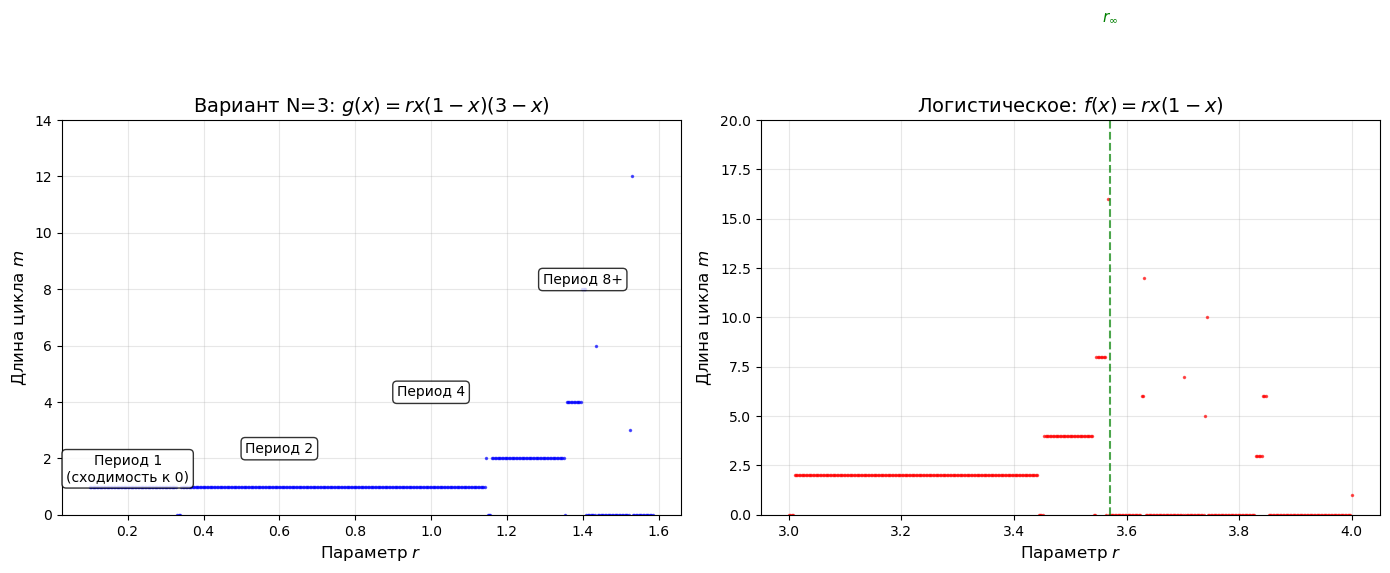

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def variant_map(x, r):
    return r * x * (1 - x) * (3 - x)

def find_period(r, x0=0.5):
    """Находит период для варианта N=3"""

    x = x0    # Переходный процесс
    for _ in range(1000):
        x = variant_map(x, r)
    seq = []    # Сохраняем последовательность
    for _ in range(2000):
        x = variant_map(x, r)
        seq.append(x)
    
    for period in range(1, 50):
        if period > len(seq)//2:
            continue
        match = True        # Проверяем повторяемость
        for i in range(period, len(seq)):
            if abs(seq[i] - seq[i % period]) > 1e-10:
                match = False
                break
        
        if match:
            return period
    return 0

plt.figure(figsize=(14, 6))# График 1: Вариант N=3
r_max = 27 / (2 * (7 * np.sqrt(7) - 10))   # Диапазон r 
r_vals = np.linspace(0.1, r_max, 400)

periods = []
for r in r_vals:
    p = find_period(r)
    periods.append(p)

plt.subplot(1, 2, 1) # Левый график
plt.plot(r_vals, periods, 'b.', markersize=3, alpha=0.6)

plt.text(0.2, 1.2, 'Период 1\n(сходимость к 0)', ha='center', fontsize=10,
         bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8))
plt.text(0.6, 2.2, 'Период 2', ha='center', fontsize=10,
         bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8))
plt.text(1.0, 4.2, 'Период 4', ha='center', fontsize=10,
         bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8))
plt.text(1.4, 8.2, 'Период 8+', ha='center', fontsize=10,
         bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8))

plt.xlabel('Параметр $r$', fontsize=12)
plt.ylabel('Длина цикла $m$', fontsize=12)
plt.title('Вариант N=3: $g(x) = r x (1-x)(3-x)$', fontsize=14)
plt.grid(True, alpha=0.3)
plt.ylim(0, 14)


plt.subplot(1, 2, 2)  # Правый график: логистическое (для сравнения)

def logistic_period(r):
    """Находит период для логистического отображения"""
    x = 0.5
    for _ in range(1000):
        x = r * x * (1 - x)
    
    seq = []
    for _ in range(2000):
        x = r * x * (1 - x)
        seq.append(x)
    
    for p in range(1, 50):
        if all(abs(seq[i] - seq[i % p]) < 1e-10 for i in range(p, len(seq))):
            return p
    return 0

r_log = np.linspace(3.0, 4.0, 400)
periods_log = [logistic_period(r) for r in r_log]

plt.plot(r_log, periods_log, 'r.', markersize=3, alpha=0.6)

r_inf = 3.5699456 # Отмечаем r_inf
plt.axvline(x=r_inf, color='green', linestyle='--', alpha=0.7)
plt.text(r_inf, 25, r'$r_\infty$', ha='center', fontsize=11, color='green')

plt.xlabel('Параметр $r$', fontsize=12)
plt.ylabel('Длина цикла $m$', fontsize=12)
plt.title('Логистическое: $f(x) = r x (1-x)$', fontsize=14)
plt.grid(True, alpha=0.3)
plt.ylim(0, 20)

plt.tight_layout()
plt.show()

## Что показали графики

### Картина для варианта N=3

**Слева** — график варианта $g(x) = r x (1-x)(3-x)$. 

Видно чёткое **разделение на этажи**:
- **Первый этаж** (r до ~0.33): все точки на высоте 1. Система сходится к постоянному значению.
- **Второй этаж** (r ~0.33-0.8): точки поднялись на высоту 2. Появился цикл из двух состояний.
- **Третий этаж** (r ~0.8-1.2): высота 4. Цикл удвоился — теперь четыре состояния.
- **Выше** (r > 1.2): точки разбросаны по разным высотам — 8, 16, иногда больше.

**Важно:** Высоты — это всегда 1, 2, 4, 8, 16... только степени двойки.

### Картина для логистики

**Справа** — график классического $f(x) = r x (1-x)$.

Та же **этажная структура**, но:
- Первый этаж начинается с r=3 (а не с 0.33)
- Этажи идут 2, 4, 8, 16...
- Есть зелёная линия $r_\infty$ ≈ 3.57 — после неё этажность сбивается, начинается хаос.

### Сходства, которые бросаются в глаза

1. **Та же "лестница":** Оба графика выглядят как ступеньки. Длина цикла не меняется плавно — она прыгает сразу на новый уровень.

2. **Та же нумерация этажей:** Только 1, 2, 4, 8, 16... Никаких 3, 5, 6, 7, 9...

3. **Та же логика:** Каждый следующий этаж в два раза выше предыдущего.

### Различия, которые важны

1. **Масштаб по горизонтали:** У варианта вся история умещается в отрезок [0, 1.6], у логистики — в [3, 4]. Вариант как будто **сжат** вдвое.

2. **Куда ведёт лестница:** У варианта последний видимый этаж — 8 или 16. У логистики лестница идёт до самого верха (большие периоды), а потом обрывается в хаос.

3. **Начало:** У варианта первый этаж (период 1) занимает заметную часть графика. У логистики его почти не видно — система почти сразу переходит к сложному поведению.

### Почему так получается

**Механизм один:** В обоих случаях работает **бифуркация удвоения периода**. 

Представь качели:
- При малых r качели стоят на месте (период 1)
- При увеличении r они начинают качаться туда-сюда (период 2)  
- При ещё большем r движение усложняется — нужно два полных качания, чтобы вернуться в исходное положение (период 4)
- И так далее...

**Разница в "жёсткости пружины":** У варианта N=3 пружина жёстче — система раньше теряет устойчивость, раньше начинает качаться, раньше переходит к сложным движениям.

### Главный вывод

**Вариант N=3 повторяет путь логистического отображения, но в ускоренном режиме.**

Всё, что логистика делает на отрезке r от 3 до 4, вариант делает на отрезке от 0.33 до 1.6. 

Если бы не ограничение $r_{max} ≈ 1.585$, вариант, скорее всего, прошёл бы тот же путь до конца — через всё более длинные циклы к полному хаосу. Но его 
диапазона r хватило только на первые несколько ступенек этой лестницы.